# [第6章: 英語テキストの処理](http://www.cl.ecei.tohoku.ac.jp/nlp100/#ch6)
英語のテキスト（[nlp.txt](http://www.cl.ecei.tohoku.ac.jp/nlp100/data/nlp.txt)）に対して，以下の処理を実行せよ．

In [33]:
!ls ../Corpus/nlp.txt

../Corpus/nlp.txt


In [34]:
import re

## 50. 文区切り
(. or ; or : or ? or !) → 空白文字 → 英大文字というパターンを文の区切りと見なし，入力された文書を1行1文の形式で出力せよ．

In [35]:
sentences = []
with open("../Corpus/nlp.txt") as f:
    for line in f:
        if line == "\n":
            continue
        line = line.replace("\n", "")
        idx, idx_start = 0, 0
        while idx < len(line):
            if re.match("[.;:?!] [A-Z]", line[idx:idx+3]):
                sentences.append(line[idx_start:idx+1])
                idx += 2
                idx_start = idx
            else:
                idx += 1
        sentences.append(line[idx_start:])

In [36]:
for sentence in sentences:
    print(sentence)

Natural language processing
From Wikipedia, the free encyclopedia
Natural language processing (NLP) is a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and human (natural) languages.
As such, NLP is related to the area of humani-computer interaction.
Many challenges in NLP involve natural language understanding, that is, enabling computers to derive meaning from human or natural language input, and others involve natural language generation.
History
The history of NLP generally starts in the 1950s, although work can be found from earlier periods.
In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.
The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English.
The authors claimed that within three or five years, machine translation would be a 

## 51. 単語の切り出し
空白を単語の区切りとみなし，50の出力を入力として受け取り，1行1単語の形式で出力せよ．ただし，文の終端では空行を出力せよ．

In [37]:
for sentence in sentences:
    for word in sentence.split():
        print(word)
    print()

Natural
language
processing

From
Wikipedia,
the
free
encyclopedia

Natural
language
processing
(NLP)
is
a
field
of
computer
science,
artificial
intelligence,
and
linguistics
concerned
with
the
interactions
between
computers
and
human
(natural)
languages.

As
such,
NLP
is
related
to
the
area
of
humani-computer
interaction.

Many
challenges
in
NLP
involve
natural
language
understanding,
that
is,
enabling
computers
to
derive
meaning
from
human
or
natural
language
input,
and
others
involve
natural
language
generation.

History

The
history
of
NLP
generally
starts
in
the
1950s,
although
work
can
be
found
from
earlier
periods.

In
1950,
Alan
Turing
published
an
article
titled
"Computing
Machinery
and
Intelligence"
which
proposed
what
is
now
called
the
Turing
test
as
a
criterion
of
intelligence.

The
Georgetown
experiment
in
1954
involved
fully
automatic
translation
of
more
than
sixty
Russian
sentences
into
English.

The
authors
claimed
that
within
three
or
five
years,
machine
translation
wo

## 52. ステミング
51の出力を入力として受け取り，Porterのステミングアルゴリズムを適用し，単語と語幹をタブ区切り形式で出力せよ． Pythonでは，Porterのステミングアルゴリズムの実装として[stemming](https://pypi.python.org/pypi/stemming)モジュールを利用するとよい．

In [38]:
from nltk.stem.porter import PorterStemmer

In [39]:
for sentence in sentences:
    for word in sentence.split():
        args = (word, PorterStemmer().stem(word))
        print("%s\t%s" % args)
    print()

Natural	natur
language	languag
processing	process

From	from
Wikipedia,	wikipedia,
the	the
free	free
encyclopedia	encyclopedia

Natural	natur
language	languag
processing	process
(NLP)	(nlp)
is	is
a	a
field	field
of	of
computer	comput
science,	science,
artificial	artifici
intelligence,	intelligence,
and	and
linguistics	linguist
concerned	concern
with	with
the	the
interactions	interact
between	between
computers	comput
and	and
human	human
(natural)	(natural)
languages.	languages.

As	As
such,	such,
NLP	nlp
is	is
related	relat
to	to
the	the
area	area
of	of
humani-computer	humani-comput
interaction.	interaction.

Many	mani
challenges	challeng
in	in
NLP	nlp
involve	involv
natural	natur
language	languag
understanding,	understanding,
that	that
is,	is,
enabling	enabl
computers	comput
to	to
derive	deriv
meaning	mean
from	from
human	human
or	or
natural	natur
language	languag
input,	input,
and	and
others	other
involve	involv
natural	natur
language	languag
generation.	generation.

History	histori



difficult	difficult
than	than
supervised	supervis
learning,	learning,
and	and
typically	typic
produces	produc
less	less
accurate	accur
results	result
for	for
a	a
given	given
amount	amount
of	of
input	input
data.	data.

However,	however,
there	there
is	is
an	an
enormous	enorm
amount	amount
of	of
non-annotated	non-annot
data	data
available	avail
(including,	(including,
among	among
other	other
things,	things,
the	the
entire	entir
content	content
of	of
the	the
World	world
Wide	wide
Web),	web),
which	which
can	can
often	often
make	make
up	up
for	for
the	the
inferior	inferior
results.	results.

NLP	nlp
using	use
machine	machin
learning	learn

Modern	modern
NLP	nlp
algorithms	algorithm
are	are
based	base
on	on
machine	machin
learning,	learning,
especially	especi
statistical	statist
machine	machin
learning.	learning.

The	the
paradigm	paradigm
of	of
machine	machin
learning	learn
is	is
different	differ
from	from
that	that
of	of
most	most
prior	prior
attempts	attempt
at	at
language	languag
proce

## 53. Tokenization
[Stanford Core NLP](http://nlp.stanford.edu/software/corenlp.shtml)を用い，入力テキストの解析結果をXML形式で得よ．また，このXMLファイルを読み込み，入力テキストを1行1単語の形式で出力せよ．

In [40]:
import xml.etree.ElementTree as ET

In [41]:
!stanford-corenlp-full-2018-10-05/corenlp.sh -annotators tokenize,ssplit,pos,lemma,ner,parse,coref -file ../Corpus/nlp.txt -outputFormat xml -outputDirectory Output

java -mx5g -cp "stanford-corenlp-full-2018-10-05/*" edu.stanford.nlp.pipeline.StanfordCoreNLP -annotators tokenize,ssplit,pos,lemma,ner,parse,coref -file ../Corpus/nlp.txt -outputFormat xml -outputDirectory Output
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/english-left3words/english-left3words-distsim.tagger ... done [2.0 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/english.all.3class.distsim.crf.ser.gz ... done [4.3 sec].
[main] INFO edu.stanford.nlp.i

In [42]:
!ls Output

nlp.txt.xml


In [43]:
root = ET.parse("Output/nlp.txt.xml").getroot()

sentences_nlp = []
for sentence_tag in root.iter("sentence"):
    sentence_nlp = []
    for word_tag in sentence_tag.iter("word"):
        sentence_nlp.append(word_tag.text)
    sentences_nlp.append(sentence_nlp)

In [44]:
for sentence_nlp in sentences_nlp:
    for word in sentence_nlp:
        print(word)

Natural
language
processing
From
Wikipedia
,
the
free
encyclopedia
Natural
language
processing
-LRB-
NLP
-RRB-
is
a
field
of
computer
science
,
artificial
intelligence
,
and
linguistics
concerned
with
the
interactions
between
computers
and
human
-LRB-
natural
-RRB-
languages
.
As
such
,
NLP
is
related
to
the
area
of
humani-computer
interaction
.
Many
challenges
in
NLP
involve
natural
language
understanding
,
that
is
,
enabling
computers
to
derive
meaning
from
human
or
natural
language
input
,
and
others
involve
natural
language
generation
.
History
The
history
of
NLP
generally
starts
in
the
1950s
,
although
work
can
be
found
from
earlier
periods
.
In
1950
,
Alan
Turing
published
an
article
titled
``
Computing
Machinery
and
Intelligence
''
which
proposed
what
is
now
called
the
Turing
test
as
a
criterion
of
intelligence
.
The
Georgetown
experiment
in
1954
involved
fully
automatic
translation
of
more
than
sixty
Russian
sentences
into
English
.
The
authors
claimed
that
within
three
or
five

## 54. 品詞タグ付け
Stanford Core NLPの解析結果XMLを読み込み，単語，レンマ，品詞をタブ区切り形式で出力せよ．

In [45]:
for word_tag, lemma_tag, pos_tag in zip(root.iter("word"), root.iter("lemma"), root.iter("POS")):
    args = (word_tag.text, lemma_tag.text, pos_tag.text)
    print("%s\t%s\t%s" % args)

Natural	natural	JJ
language	language	NN
processing	processing	NN
From	from	IN
Wikipedia	Wikipedia	NNP
,	,	,
the	the	DT
free	free	JJ
encyclopedia	encyclopedia	NN
Natural	natural	JJ
language	language	NN
processing	processing	NN
-LRB-	-lrb-	-LRB-
NLP	nlp	NN
-RRB-	-rrb-	-RRB-
is	be	VBZ
a	a	DT
field	field	NN
of	of	IN
computer	computer	NN
science	science	NN
,	,	,
artificial	artificial	JJ
intelligence	intelligence	NN
,	,	,
and	and	CC
linguistics	linguistics	NNS
concerned	concern	VBN
with	with	IN
the	the	DT
interactions	interaction	NNS
between	between	IN
computers	computer	NNS
and	and	CC
human	human	JJ
-LRB-	-lrb-	-LRB-
natural	natural	JJ
-RRB-	-rrb-	-RRB-
languages	language	NNS
.	.	.
As	as	IN
such	such	JJ
,	,	,
NLP	nlp	NN
is	be	VBZ
related	relate	VBN
to	to	TO
the	the	DT
area	area	NN
of	of	IN
humani-computer	humani-computer	JJ
interaction	interaction	NN
.	.	.
Many	many	JJ
challenges	challenge	NNS
in	in	IN
NLP	nlp	NN
involve	involve	VBP
natural	natural	JJ
language	language	NN
understanding	unde

## 55. 固有表現抽出
入力文中の人名をすべて抜き出せ．

In [46]:
for word_tag, ner_tag in zip(root.iter("word"), root.iter("NER")):
    if ner_tag.text == "PERSON":
        print(word_tag.text)

Alan
Turing
Joseph
Weizenbaum
MARGIE
Schank
Wilensky
Meehan
Lehnert
Carbonell
Lehnert
Racter
Jabberwacky
Moore


## 56. 共参照解析
Stanford Core NLPの共参照解析の結果に基づき，文中の参照表現（mention）を代表参照表現（representative mention）に置換せよ．ただし，置換するときは，「代表参照表現（参照表現）」のように，元の参照表現が分かるように配慮せよ．

In [47]:
from copy import deepcopy

In [48]:
coreferences = []
for coreference_tag in list(root.iter("coreference"))[0]:
    mentions = []
    for mention_tag in coreference_tag.iter("mention"):
        mention = {}
        # sentence, start, end, head, text
        children = list(mention_tag)
        mention["sentence"] = int(children[0].text)
        mention["start"] = int(children[1].text)
        mention["end"] = int(children[2].text)
        mention["text"] = children[4].text
        mentions.append(mention)
    coreferences.append(mentions)

In [49]:
sentences_56 = deepcopy(sentences_nlp)

for mentions in coreferences:
    representative_mention = mentions[0]["text"]
    for mention in mentions[1:]:
        foo = (mention["sentence"], mention["start"], mention["end"], mention["text"])
        sentences_56[foo[0]-1][foo[1]-1] = representative_mention + "(" + foo[3] + ")"
        for i in range(foo[1], foo[2]-1):
            sentences_56[foo[0]-1][i] = None

In [50]:
for sentence_56 in sentences_56:
    for idx, word in enumerate(sentence_56):
        if word is not None:
            if idx == 0:
                print(word, end="")
            elif idx < len(sentence_56)-1:
                print(" " + word, end="")
            else:
                print(word)

Natural language processing From Wikipedia , the free encyclopedia Natural language processing -LRB- NLP -RRB- is a field of computer science , artificial intelligence , and linguistics concerned with the interactions between computers and human -LRB- natural -RRB- languages.
As such , NLP(NLP) is related to the area of humani-computer interaction.
Many challenges in NLP(NLP) involve natural language understanding , that is , enabling computers to derive meaning from human or natural language input , and others involve natural language generation.
History The history of NLP(NLP) generally starts in the 1950s , although work can be found from earlier periods.
In 1950 , Alan Turing published an article titled `` Computing Machinery and Intelligence '' which proposed what is now called the Turing test as a criterion of intelligence.
The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English.
The authors claimed that within thre

The subfield of NLP devoted to learning approaches is known as Natural Language Learning -LRB- NLL -RRB- and NLL(its) conference CoNLL and peak body SIGNLL are sponsored by ACL , recognizing also their links with Computational Linguistics and Language Acquisition.
When the aims of computational language learning research is to understand more about human language acquisition , or psycholinguistics , NLL(NLL) overlaps into the related field of Computational Psycholinguistics.


## 57. 係り受け解析
Stanford Core NLPの係り受け解析の結果（collapsed-dependencies）を有向グラフとして可視化せよ．可視化には，係り受け木を[DOT言語](http://ja.wikipedia.org/wiki/DOT%E8%A8%80%E8%AA%9E)に変換し，[Graphviz](http://www.graphviz.org/)を用いるとよい．また，Pythonから有向グラフを直接的に可視化するには，[pydot](https://code.google.com/p/pydot/)を使うとよい．

In [51]:
import graphviz

In [52]:
sentences_57 = []
for sentence_tag in list(root.iter("sentences"))[0].iter("sentence"):
    sentence_57 = {}

    nodes = {0: "ROOT"}
    for token_tag in sentence_tag.iter("token"):
        i = token_tag.get("id")
        nodes[i] = list(token_tag)[0].text
    sentence_57["nodes"] = nodes

    dependencies_tag = list(sentence_tag.iter("dependencies"))[1]
    edges = {}
    for dep_tag in list(dependencies_tag):
        edge = list(dep_tag)
        edge_from, edge_to = edge[0].get("idx"), edge[1].get("idx")
        if edge_from in edges:
            edges[edge_from].append(edge_to)
        else:
            edges[edge_from] = [edge_to]
    sentence_57["edges"] = edges

    sentences_57.append(sentence_57)

In [53]:
def show_dependency_tree(sentence_57: dict):
    digraph = graphviz.Digraph()

    for i, label in sentence_57["nodes"].items():
        digraph.node(str(i), label=label)

    for edge_from, edges_to in sentence_57["edges"].items():
        for edge_to in edges_to:
            digraph.edge(edge_from, edge_to)

    digraph.view()
    return digraph

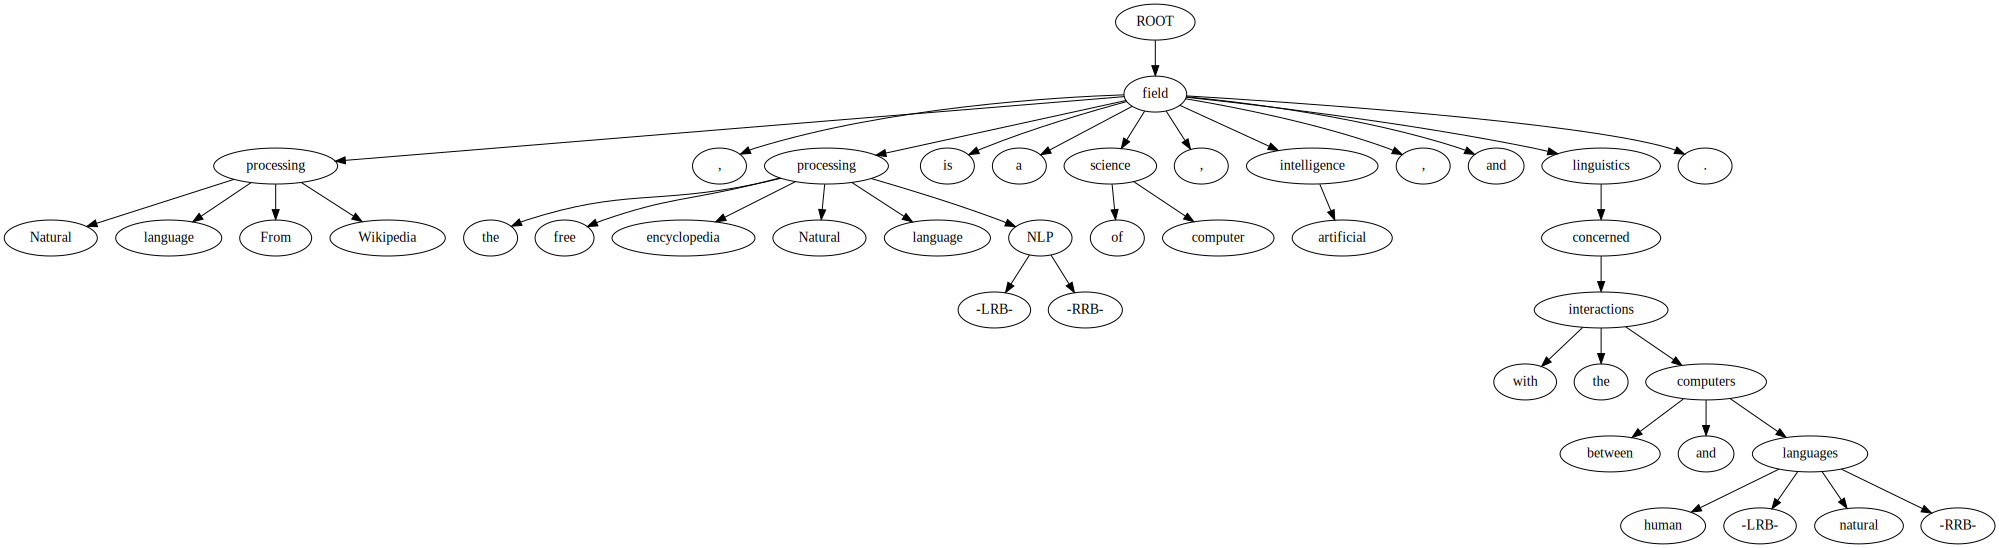

In [54]:
show_dependency_tree(sentences_57[0])

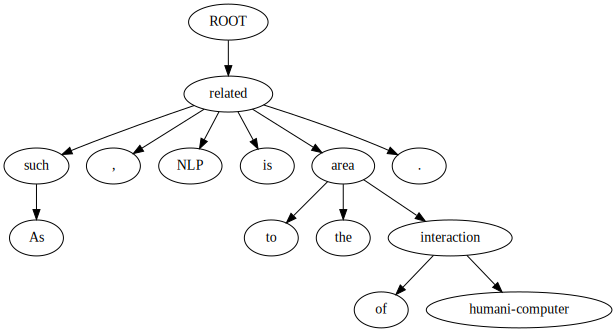

In [55]:
show_dependency_tree(sentences_57[1])

## 58. タプルの抽出
Stanford Core NLPの係り受け解析の結果（collapsed-dependencies）に基づき，「主語 述語 目的語」の組をタブ区切り形式で出力せよ．ただし，主語，述語，目的語の定義は以下を参考にせよ．
* 述語: nsubj関係とdobj関係の子（dependant）を持つ単語
* 主語: 述語からnsubj関係にある子（dependent）
* 目的語: 述語からdobj関係にある子（dependent）

### memo
governor→dependentとすると、
* nsubj : 述語→主語
* dobj : 述語→目的語

In [56]:
for sentence_tag in list(root.iter("sentences"))[0].iter("sentence"):
    nodes = {0: "ROOT"}
    for token_tag in sentence_tag.iter("token"):
        i = token_tag.get("id")
        nodes[i] = list(token_tag)[0].text

    dependencies_tag = list(sentence_tag.iter("dependencies"))[1]
    nsubj, dobj = {}, {}
    for dep_tag in list(dependencies_tag):
        edge = list(dep_tag)
        governor, dependent = edge[0].get("idx"), edge[1].get("idx")
        if dep_tag.get("type") == "nsubj":
            nsubj[governor] = dependent
        elif dep_tag.get("type") == "dobj":
            dobj[governor] = dependent

    for predicate in set(nsubj.keys()) & set(dobj.keys()):
        args = (nodes[nsubj[predicate]], nodes[predicate], nodes[dobj[predicate]])
        print("%s\t%s\t%s" % args)

others	involve	generation
understanding	enabling	computers
Turing	published	article
experiment	involved	translation
ELIZA	provided	interaction
ELIZA	provide	response
patient	exceeded	base
which	structured	information
that	underlies	approach
underpinnings	discouraged	sort
Some	produced	systems
which	make	decisions
systems	rely	which
that	contains	errors
implementations	involved	coding
algorithms	take	set
Some	produced	systems
which	make	decisions
they	express	certainty
models	have	advantage
Systems	have	advantages
Automatic	make	use
that	make	decisions


## 59. S式の解析
Stanford Core NLPの句構造解析の結果（S式）を読み込み，文中のすべての名詞句（NP）を表示せよ．入れ子になっている名詞句もすべて表示すること．

### memo
As such, NLP is related to the area of humani-computer interaction.
```
(ROOT (S (PP (IN As) (NP (JJ such))) (, ,) (NP (NN NLP)) (VP (VBZ is) (ADJP (VBN related) (PP (TO to) (NP (NP (DT the) (NN area)) (PP (IN of) (NP (JJ humani-computer) (NN interaction))))))) (. .)))
```
```
(NP (JJ such))
(NP (NN NLP))
(NP (NP (DT the) (NN area)) (PP (IN of) (NP (JJ humani-computer) (NN interaction))))
(NP (DT the) (NN area))
(NP (JJ humani-computer) (NN interaction))
```
* such
* NLP
* the area of humani-computer interaction
* the area
* humani-computer interaction

In [126]:
def print_NPs(s_formula: str):
    pos, word = re.search(r"\((.*?) (.*)\)", s_formula).group(1, 2)

    if word[0] == "(" and word[-1] == ")":
        depth, idx, idx_start = 0, 0, 0
        while idx < len(word):
            if word[idx] == "(":
                depth += 1
            elif word[idx] == ")":
                depth -= 1
            if depth == 0:
                print_NPs(word[idx_start:idx+1])
                idx += 2
                idx_start = idx
            else:
                idx += 1

    if pos == "NP":
        nps, np, is_bracket, is_blank = [], "", False, False
        for char in word:
            if char == "(":
                is_bracket, is_blank = True, False
                continue
            elif char == " " and is_bracket:
                is_blank = True
                continue
            elif char == ")" and np != "":
                nps.append(np)
                is_bracket, is_blank, np = False, False, ""
                continue
            if is_bracket and is_blank:
                np += char
        print(" ".join(nps))

In [127]:
parses = [parse.text for parse in root.iter("parse")]
parse = parses[1]
for parse in parses:
    print_NPs(parse.strip())

Natural language processing
Wikipedia
the free encyclopedia Natural language processing
NLP
the free encyclopedia Natural language processing -LRB- NLP -RRB-
a field
computer science
a field of computer science
artificial intelligence
linguistics
the interactions
computers
human -LRB- natural -RRB- languages
computers and human -LRB- natural -RRB- languages
the interactions between computers and human -LRB- natural -RRB- languages
linguistics concerned with the interactions between computers and human -LRB- natural -RRB- languages
a field of computer science , artificial intelligence , and linguistics concerned with the interactions between computers and human -LRB- natural -RRB- languages
such
NLP
the area
humani-computer interaction
the area of humani-computer interaction
Many challenges
NLP
Many challenges in NLP
natural language understanding
natural language understanding , that is ,
computers
meaning
human or natural language input
others
natural language generation
History The h